In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
plt.rcParams.update({'font.size': 14})

### 读取文件

In [2]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")
sub_sample = pd.read_csv("./sample_submission.csv")

print(train.shape , test.shape , sub_sample.shape)

(7613, 5) (3263, 4) (3263, 2)


### 简单探索一下数据

In [3]:
train.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [4]:
train.duplicated().sum() #求重复行数，看结果是没有重复数据的

0

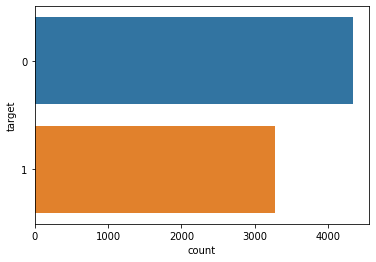

In [5]:
sns.countplot(y=train.target);

算一下rtain和test里面空数据情况

In [6]:
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [7]:
test.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

### 看keywords这列数据

In [8]:
print(train.keyword.nunique() , test.keyword.nunique())
print(set(train.keyword.unique()) - set(test.keyword.unique()))

221 221
set()


看结果来是train和test里面有相同的keyword

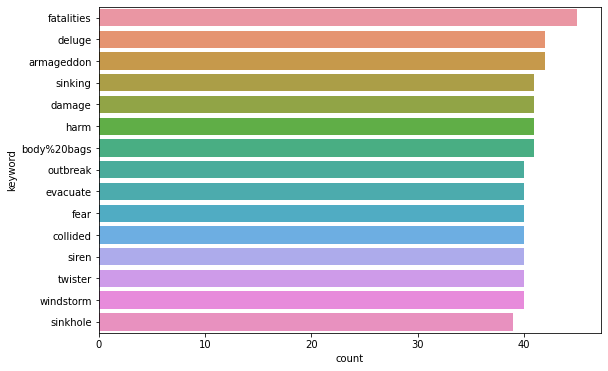

In [9]:
plt.figure(figsize = (9,6))
sns.countplot(y=train.keyword , order=train.keyword.value_counts().iloc[:15].index)
plt.show()

/root/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/root/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


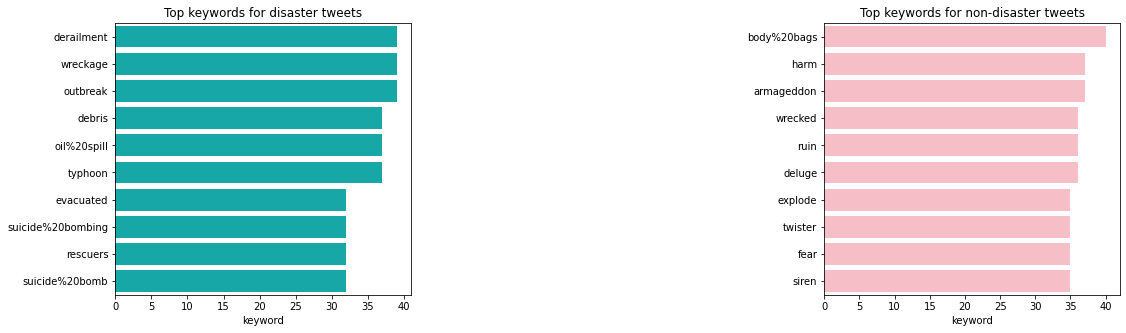

In [10]:
kw_d = train[train["target"] == 1].keyword.value_counts().head(10)
kw_nd = train[train["target"] == 0].keyword.value_counts().head(10)

plt.figure(figsize=(18,5))
plt.subplot(131)
sns.barplot(kw_d , kw_d.index , color='c')
plt.title('Top keywords for disaster tweets')
plt.subplot(133)
sns.barplot(kw_nd , kw_nd.index , color='lightpink')
plt.title('Top keywords for non-disaster tweets')

plt.show()

/tmp/ipykernel_1620/1980247581.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_d = train.groupby('keyword').mean()['target'].sort_values(ascending=False).head(10) #最高的10个
/tmp/ipykernel_1620/1980247581.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_nd = train.groupby('keyword').mean()['target'].sort_values().head(10) #末尾10个
/root/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will r

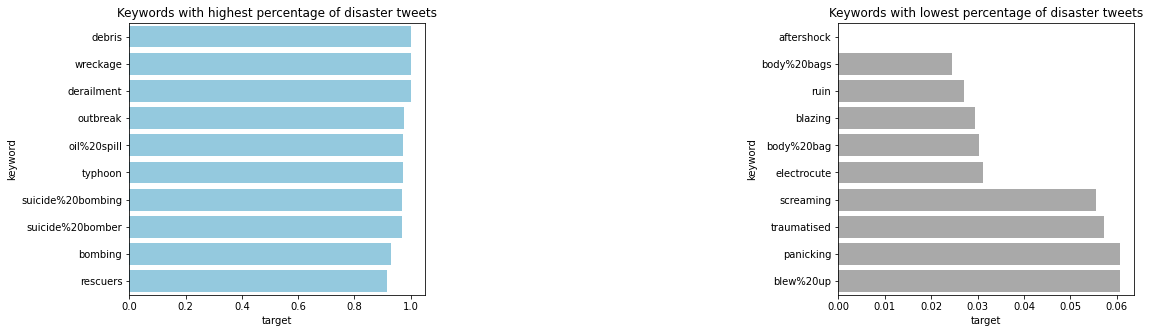

In [11]:
top_d = train.groupby('keyword').mean()['target'].sort_values(ascending=False).head(10) #最高的10个
top_nd = train.groupby('keyword').mean()['target'].sort_values().head(10) #末尾10个

plt.figure(figsize=(18,5))
plt.subplot(131)
sns.barplot(top_d , top_d.index , color='skyblue')
plt.title('Keywords with highest percentage of disaster tweets')
plt.subplot(133)
sns.barplot(top_nd , top_nd.index , color='darkgray')
plt.title('Keywords with lowest percentage of disaster tweets')

plt.show()

### 看看location属性

In [12]:
print(train["location"].nunique() , test["location"].nunique())

3341 1602


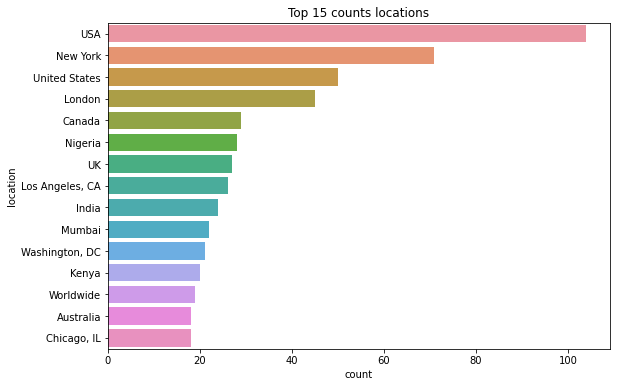

In [13]:
plt.figure(figsize=(9,6))
sns.countplot(y=train["location"] , order=train["location"].value_counts().iloc[:15].index)
plt.title("Top 15 counts locations")
plt.show()

由于位置是自由文本，数据不干净，您可以在顶部位置同时看到“USA”和“United States”。然后，我们查看了灾难推文中的常见地点。

/tmp/ipykernel_1620/3485893326.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_l = top_only.groupby("location").mean()['target'].sort_values(ascending=False)


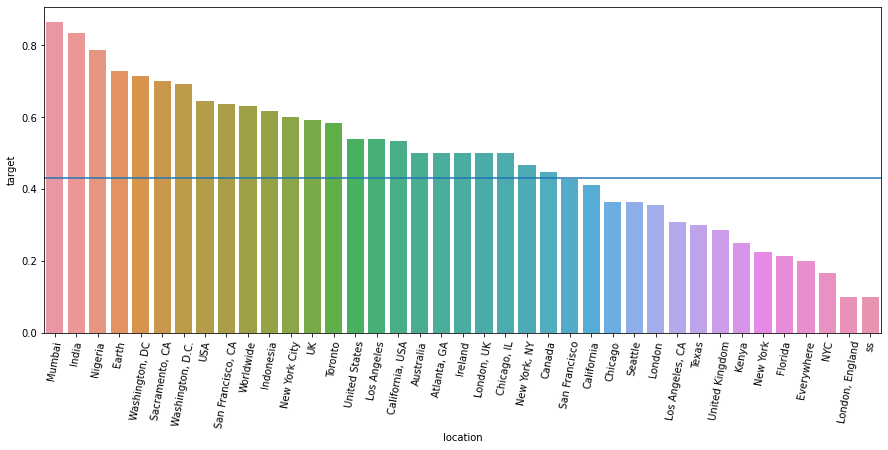

In [14]:
row_loc = train.location.value_counts()
top_loc = list(row_loc[row_loc >= 10].index)
top_only = train[train.location.isin(top_loc)]

top_l = top_only.groupby("location").mean()['target'].sort_values(ascending=False)
plt.figure(figsize=(15,6))
sns.barplot(x=top_l.index , y=top_l)
plt.axhline(np.mean(train["target"]))
plt.xticks(rotation=80)
plt.show()

灾难推文占比最高的前三个地点是孟买、伊尼达和尼日利亚。由于位置数据不干净，我们看到了一些有趣的案例，例如“英国伦敦”的灾难推文中，百分比高于平均值，但“伦敦”低于平均值。我们试图清理位置，看看是否存在任何差异：

In [15]:
#处理空缺值
for col in ['keyword' , 'location']:
    train[col] = train[col].fillna('None')
    test[col] = test[col].fillna('None')

#手动将数据中location中同一地区的不同输入做统一化
def clean_loc(x):
    if x == 'None':
        return 'None'
    elif x == 'Earth' or x =='Worldwide' or x == 'Everywhere':
        return 'World'
    elif 'New York' in x or 'NYC' in x:
        return 'New York'    
    elif 'London' in x:
        return 'London'
    elif 'Mumbai' in x:
        return 'Mumbai'
    elif 'Washington' in x and 'D' in x and 'C' in x:
        return 'Washington DC'
    elif 'San Francisco' in x:
        return 'San Francisco'
    elif 'Los Angeles' in x:
        return 'Los Angeles'
    elif 'Seattle' in x:
        return 'Seattle'
    elif 'Chicago' in x:
        return 'Chicago'
    elif 'Toronto' in x:
        return 'Toronto'
    elif 'Sacramento' in x:
        return 'Sacramento'
    elif 'Atlanta' in x:
        return 'Atlanta'
    elif 'California' in x:
        return 'California'
    elif 'Florida' in x:
        return 'Florida'
    elif 'Texas' in x:
        return 'Texas'
    elif 'United States' in x or 'USA' in x:
        return 'USA'
    elif 'United Kingdom' in x or 'UK' in x or 'Britain' in x:
        return 'UK'
    elif 'Canada' in x:
        return 'Canada'
    elif 'India' in x:
        return 'India'
    elif 'Kenya' in x:
        return 'Kenya'
    elif 'Nigeria' in x:
        return 'Nigeria'
    elif 'Australia' in x:
        return 'Australia'
    elif 'Indonesia' in x:
        return 'Indonesia'
    elif x in top_loc:
        return x
    else: return 'Others'
    
train['location_clean'] = train['location'].apply(lambda x: clean_loc(str(x)))
test['location_clean'] = test['location'].apply(lambda x: clean_loc(str(x)))

/tmp/ipykernel_1620/2538636756.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_location_2 = train.groupby("location_clean").mean()["target"].sort_values(ascending=False)


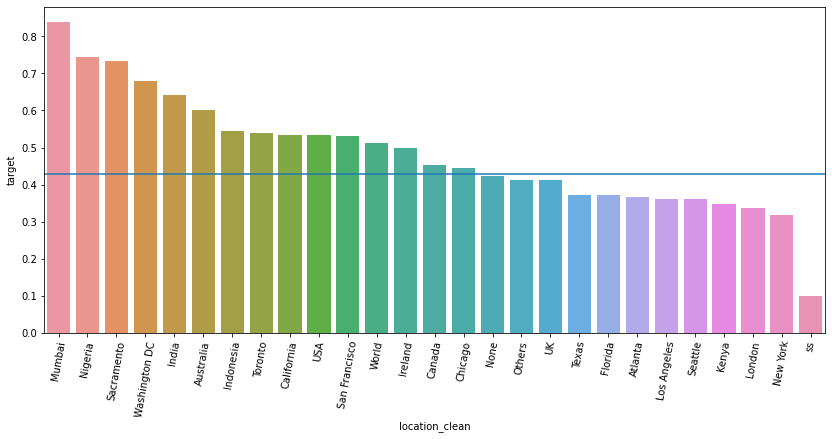

In [16]:
top_location_2 = train.groupby("location_clean").mean()["target"].sort_values(ascending=False)
plt.figure(figsize=(14,6))
sns.barplot(x=top_location_2.index , y=top_location_2)
plt.axhline(np.mean(train["target"]))
plt.xticks(rotation=80)
plt.show()

孟买和尼日利亚仍然位居榜首。除了奇怪的“ss”，伦敦和纽约在百分比的灾难推文中垫底

### 开始清洗text列

1.删除链接和不必要的空白 \
2.创建包含标签、提及和链接列表的单独列 \
3.自定义template合并文字信息

In [17]:
import re

test_str = train.loc[416 , "text"]
text_no_link = re.sub(r'https?://\S+' , '' , test_str)
text_no_lineBreak = re.sub(r'\n' , ' ' , test_str)
text_no_others = re.sub('\s+' , ' ' , test_str).strip()

print(f"remove Link: \n{test_str} -> {text_no_link}")
print()
print(f"remove line breaks: \n{test_str} -> {text_no_lineBreak}")
print()
print(f"remove others: \n{test_str} -> {text_no_others}")

remove Link: 
Suspected serial arsonist arrested in Calif. http://t.co/PzotPDGAkI -> Suspected serial arsonist arrested in Calif. 

remove line breaks: 
Suspected serial arsonist arrested in Calif. http://t.co/PzotPDGAkI -> Suspected serial arsonist arrested in Calif. http://t.co/PzotPDGAkI

remove others: 
Suspected serial arsonist arrested in Calif. http://t.co/PzotPDGAkI -> Suspected serial arsonist arrested in Calif. http://t.co/PzotPDGAkI


In [18]:
 def clean_text(text):
    text = re.sub(r'https?://\S+' , '' , text) #remove Link
    text = re.sub(r'\n' , ' ' , text) #remove line breaks
    text = re.sub('\s+' , ' ' , text) #remove leading , trailing and extra spaces
    return text
print("Original text: " + test_str)
print("Cleaned text: " + clean_text(test_str))

Original text: Suspected serial arsonist arrested in Calif. http://t.co/PzotPDGAkI
Cleaned text: Suspected serial arsonist arrested in Calif. 


截取一些抽取hashtage、mentions、link等的文字信息

In [19]:
for match in re.finditer(r'#\w+' , train.loc[12 , "text"]):
    print(f'match : {match}')
    print(f'match.group(0) : {match.group(0)}')
    print(f'match.group(0)[1:] : {match.group(0)[1:]}')
    print('-------------------------------------------')
    

match : <re.Match object; span=(0, 8), match='#raining'>
match.group(0) : #raining
match.group(0)[1:] : raining
-------------------------------------------
match : <re.Match object; span=(9, 18), match='#flooding'>
match.group(0) : #flooding
match.group(0)[1:] : flooding
-------------------------------------------
match : <re.Match object; span=(19, 27), match='#Florida'>
match.group(0) : #Florida
match.group(0)[1:] : Florida
-------------------------------------------
match : <re.Match object; span=(28, 37), match='#TampaBay'>
match.group(0) : #TampaBay
match.group(0)[1:] : TampaBay
-------------------------------------------
match : <re.Match object; span=(38, 44), match='#Tampa'>
match.group(0) : #Tampa
match.group(0)[1:] : Tampa
-------------------------------------------


In [20]:
def find_hashtags(tweet):
    return " ".join([match.group(0)[1:] for match in re.finditer(r'#\w+' , tweet)]) or 'no'

def find_mentions(tweet):
    return " ".join([match.group(0)[1:] for match in re.finditer(r"@\w+" , tweet)]) or 'no'

def find_links(tweet):
    return " ".join([match.group(0)[:] for match in re.finditer(r"https?://\S+", tweet)]) or 'no'

def process_text(df):
    df['text_clean'] = df['text'].apply(lambda x: clean_text(x))
    df['hashtags'] = df['text'].apply(lambda x: find_hashtags(x))
    df['mentions'] = df['text'].apply(lambda x: find_mentions(x))
    df['links'] = df['text'].apply(lambda x: find_links(x))
    df['hashtags'].fillna(value='no', inplace=True)
    df['mentions'].fillna(value='no', inplace=True)
    return df

train = process_text(train)
test = process_text(test)

In [21]:
train

,id,keyword,location,text,target,location_clean,text_clean,hashtags,mentions,links
0,1,None,None,Our Deeds are the Reason of this #earthquake M...,1,None,Our Deeds are the Reason of this #earthquake M...,earthquake,no,no
1,4,None,None,Forest fire near La Ronge Sask. Canada,1,None,Forest fire near La Ronge Sask. Canada,no,no,no
2,5,None,None,All residents asked to 'shelter in place' are ...,1,None,All residents asked to 'shelter in place' are ...,no,no,no
3,6,None,None,"13,000 people receive #wildfires evacuation or...",1,None,"13,000 people receive #wildfires evacuation or...",wildfires,no,no
4,7,None,None,Just got sent this photo from Ruby #Alaska as ...,1,None,Just got sent this photo from Ruby #Alaska as ...,Alaska wildfires,no,no
...,...,...,...,...,...,...,...,...,...,...
7608,10869,None,None,Two giant cranes holding a bridge collapse int...,1,None,Two giant cranes holding a bridge collapse int...,no,no,http://t.co/STfMbbZFB5
7609,10870,None,None,@aria_ahrary @TheTawniest The out of control w...,1,None,@aria_ahrary @TheTawniest The out of control w...,no,aria_ahrary TheTawniest,no
7610,10871,None,None,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,None,M1.94 [01:04 UTC]?5km S of Volcano Hawaii.,no,no,http://t.co/zDtoyd8EbJ
7611,10872,None,None,Police investigating after an e-bike collided ...,1,None,Police investigating after an e-bike collided ...,no,no,no


设置template转化所有特征为一句话

In [22]:
train["combind_text"] = train.apply(lambda row: "Published in " + row["location_clean"] +\
                                                    ", the text says : " + row["text_clean"] +\
                                                    ", with the tags : " + row["hashtags"] +\
                                                    ", the mentions : " + row["mentions"] +\
                                                    ", and the link : " + row["links"] , axis=1)
test["combind_text"] = test.apply(lambda row: "Published in " + row["location_clean"] +\
                                                    ", the text says : " + row["text_clean"] +\
                                                    ", with the tags : " + row["hashtags"] +\
                                                    ", the mentions : " + row["mentions"] +\
                                                    ", and the link : " + row["links"] , axis=1)

In [23]:
print(train.loc[0 , "combind_text"])

Published in None, the text says : Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all, with the tags : earthquake, the mentions : no, and the link : no


In [24]:
train[["combind_text","target"]].to_csv("train_data.csv" , index=False)
test["combind_text"].to_csv("test_data.csv" , index=False)

### 开始使用RoBERTa

读取数据

In [25]:
from datasets import load_dataset, Dataset
mydata = load_dataset("csv" , data_files="./train_data.csv")["train"]
mydata

Using custom data configuration default-704543df14ffd6aa


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-704543df14ffd6aa/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317. Subsequent calls will reuse this data.


/root/miniconda3/lib/python3.8/site-packages/datasets/download/streaming_download_manager.py:714: FutureWarning: the 'mangle_dupe_cols' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'mangle_dupe_cols'
  return pd.read_csv(xopen(filepath_or_buffer, "rb", use_auth_token=use_auth_token), **kwargs)


  0%|          | 0/1 [00:00<?, ?it/s]

Dataset({
    features: ['combind_text', 'target'],
    num_rows: 7613
})

In [26]:
mydata = mydata.train_test_split(test_size=0.1)
mydata

DatasetDict({
    train: Dataset({
        features: ['combind_text', 'target'],
        num_rows: 6851
    })
    test: Dataset({
        features: ['combind_text', 'target'],
        num_rows: 762
    })
})

In [27]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("roberta-base")
tokenizer

PreTrainedTokenizerFast(name_or_path='roberta-base', vocab_size=50265, model_max_len=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=False)})

In [28]:
def tokenize(example):
    return tokenizer(example["combind_text"], truncation=True)
md = mydata.map(tokenize, batched=True)
md

  0%|          | 0/7 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

DatasetDict({
    train: Dataset({
        features: ['combind_text', 'target', 'input_ids', 'attention_mask'],
        num_rows: 6851
    })
    test: Dataset({
        features: ['combind_text', 'target', 'input_ids', 'attention_mask'],
        num_rows: 762
    })
})

In [29]:
md["train"][0]

{'combind_text': 'Published in None, the text says : My first staining attempt was a disaster , with the tags : no, the mentions : no, and the link : https://t.co/buDmKE3nNf',
 'target': 0,
 'input_ids': [0,
  29642,
  11,
  9291,
  6,
  5,
  2788,
  161,
  4832,
  1308,
  78,
  1690,
  8173,
  2120,
  21,
  10,
  4463,
  2156,
  19,
  5,
  19445,
  4832,
  117,
  6,
  5,
  19197,
  4832,
  117,
  6,
  8,
  5,
  3104,
  4832,
  1205,
  640,
  90,
  4,
  876,
  73,
  9519,
  495,
  119,
  6961,
  246,
  282,
  487,
  506,
  2],
 'attention_mask': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1]}

In [30]:
train_data = md["train"]
test_data = md["test"]
#已经有了input_ids了，不需要文本信息了，顺便改一下target的列名
train_data = train_data.remove_columns(["combind_text"]).rename_column('target', "labels").with_format("torch")
test_data = test_data.remove_columns(["combind_text"]).rename_column('target', "labels").with_format("torch")

In [31]:
train_data

Dataset({
    features: ['labels', 'input_ids', 'attention_mask'],
    num_rows: 6851
})

包装batch

In [42]:
from transformers import DataCollatorWithPadding
from torch.utils.data import DataLoader

datacol = DataCollatorWithPadding(tokenizer)
trainloader = DataLoader(train_data , 
                         batch_size=32 , 
                         shuffle=True , 
                         collate_fn=datacol)
testloader = DataLoader(test_data, batch_size=32, collate_fn=datacol)

In [33]:
trainloader

In [34]:
!pip install accelerate

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Looking in indexes: https://repo.huaweicloud.com/repository/pypi/simple


In [35]:
from accelerate import Accelerator
from transformers import AutoModelForSequenceClassification
accelerator = Accelerator()
model = AutoModelForSequenceClassification.from_pretrained("roberta-base", num_labels=2)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.layer_norm.weight', 'roberta.pooler.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'roberta.pooler.dense.bias', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.

In [36]:
from transformers import AdamW
optim = AdamW(model.parameters(), lr=5e-5)

/root/miniconda3/lib/python3.8/site-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [37]:
from tqdm.auto import tqdm
import torch
device = accelerator.device
model=model.to(device)
print(device)

cuda


In [46]:
from datasets import load_metric
f1 = load_metric("f1")
acc = load_metric("accuracy")

Using the latest cached version of the module from /root/.cache/huggingface/modules/datasets_modules/metrics/f1/1ae7ede7c974ce472c931da73bdb2e3f0e1044a996d2348b328773d44dd1847b (last modified on Tue Jan 10 02:36:43 2023) since it couldn't be found locally at f1, or remotely on the Hugging Face Hub.


In [45]:
model, optimizer, trainloader = accelerator.prepare(model, optim, trainloader)
testloader = accelerator.prepare(testloader)

验证函数

In [47]:
def validate(model):
    for batch in testloader:
        #batch = {k:v.cuda() for k,v in batch.items()}
        outputs = model(**batch)
        predictions=torch.argmax(outputs.logits, dim=-1)
        #f1.add_batch(predictions=predictions, references=batch["labels"])
        f1.add_batch(predictions=accelerator.gather(predictions), references=accelerator.gather(batch["labels"]))
        #acc.add_batch(predictions=predictions, references=batch["labels"])
        acc.add_batch(predictions=accelerator.gather(predictions), references=accelerator.gather(batch["labels"]))
    acc_res = acc.compute()["accuracy"]
    print(f"Validation Accuracy: {acc_res:.2f}")
    f_res = f1.compute()["f1"]
    print(f"Validation F1-score: {f_res:.2f}")
    return acc_res

训练函数

In [48]:
from copy import deepcopy

nsteps=214
nepoch=10
best_val_acc = 0
for epoch in range(nepoch):
    model.train()
    print(f"epoch n°{epoch+1}:")
    av_epoch_loss=0
    progress_bar = tqdm(range(nsteps))
    for batch in trainloader:
        #batch = {k:v.cuda() for k,v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss
        av_epoch_loss += loss
        #loss.backward()
        accelerator.backward(loss)
        optim.step()
        optim.zero_grad()
        predictions=torch.argmax(outputs.logits, dim=-1)
        f1.add_batch(predictions=predictions, references=batch["labels"])
        acc.add_batch(predictions=predictions, references=batch["labels"])
        progress_bar.update(1)
    av_epoch_loss /= nsteps
    print(f"Training Loss: {av_epoch_loss: .2f}")
    acc_res = acc.compute()["accuracy"]
    print(f"Training Accuracy: {acc_res:.2f}")
    f_res = f1.compute()["f1"]
    print(f"Training F1-score: {f_res:.2f}")
    model.eval()
    val_acc = validate(model)
    if val_acc > best_val_acc:
        print("Achieved best validation accuracy so far. Saving model.")
        best_val_acc = val_acc
        best_model_state = deepcopy(model.state_dict())
    print("\n\n")

epoch n°1:


  0%|          | 0/214 [00:00<?, ?it/s]

You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Training Loss:  0.48
Training Accuracy: 0.80
Training F1-score: 0.74
Validation Accuracy: 0.85
Validation F1-score: 0.80
Achieved best validation accuracy so far. Saving model.



epoch n°2:


  0%|          | 0/214 [00:00<?, ?it/s]

Training Loss:  0.37
Training Accuracy: 0.85
Training F1-score: 0.82
Validation Accuracy: 0.86
Validation F1-score: 0.82
Achieved best validation accuracy so far. Saving model.



epoch n°3:


  0%|          | 0/214 [00:00<?, ?it/s]

Training Loss:  0.32
Training Accuracy: 0.88
Training F1-score: 0.85
Validation Accuracy: 0.86
Validation F1-score: 0.82
Achieved best validation accuracy so far. Saving model.



epoch n°4:


  0%|          | 0/214 [00:00<?, ?it/s]

Training Loss:  0.26
Training Accuracy: 0.90
Training F1-score: 0.88
Validation Accuracy: 0.84
Validation F1-score: 0.79



epoch n°5:


  0%|          | 0/214 [00:00<?, ?it/s]

Training Loss:  0.21
Training Accuracy: 0.93
Training F1-score: 0.91
Validation Accuracy: 0.85
Validation F1-score: 0.80



epoch n°6:


  0%|          | 0/214 [00:00<?, ?it/s]

Training Loss:  0.17
Training Accuracy: 0.94
Training F1-score: 0.93
Validation Accuracy: 0.83
Validation F1-score: 0.78



epoch n°7:


  0%|          | 0/214 [00:00<?, ?it/s]

Training Loss:  0.14
Training Accuracy: 0.95
Training F1-score: 0.94
Validation Accuracy: 0.81
Validation F1-score: 0.78



epoch n°8:


  0%|          | 0/214 [00:00<?, ?it/s]

Training Loss:  0.12
Training Accuracy: 0.96
Training F1-score: 0.95
Validation Accuracy: 0.79
Validation F1-score: 0.77



epoch n°9:


  0%|          | 0/214 [00:00<?, ?it/s]

Training Loss:  0.12
Training Accuracy: 0.96
Training F1-score: 0.95
Validation Accuracy: 0.85
Validation F1-score: 0.81



epoch n°10:


  0%|          | 0/214 [00:00<?, ?it/s]

Training Loss:  0.10
Training Accuracy: 0.96
Training F1-score: 0.96
Validation Accuracy: 0.84
Validation F1-score: 0.80





In [49]:
torch.save(best_model_state, 'model_state_dict1.pth')

### 使用模型构建提交文件

In [28]:
import torch
from transformers import AutoModelForSequenceClassification
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("roberta-base")
model = AutoModelForSequenceClassification.from_pretrained("roberta-base", num_labels=2)
state_dict = torch.load('model_state_dict1.pth')
model.load_state_dict(state_dict)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.dense.weight', 'roberta.pooler.dense.bias', 'roberta.pooler.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifi

<All keys matched successfully>

In [35]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0): RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerN

In [26]:
from datasets import load_dataset , Dataset
dataToPred = load_dataset("csv" , data_files="./test_data.csv")["train"]
dataToPred

Using custom data configuration default-2decda1024400709
Found cached dataset csv (/root/.cache/huggingface/datasets/csv/default-2decda1024400709/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317)


  0%|          | 0/1 [00:00<?, ?it/s]

Dataset({
    features: ['combind_text'],
    num_rows: 3263
})

In [30]:
def tokenize(example):
    return tokenizer(example["combind_text"] , truncation=True)
dataToPred = dataToPred.map(tokenize , batched=True)

  0%|          | 0/4 [00:00<?, ?ba/s]

In [31]:
dataToPred

Dataset({
    features: ['combind_text', 'input_ids', 'attention_mask'],
    num_rows: 3263
})

In [33]:
dataToPred = dataToPred.remove_columns(["combind_text"]).with_format("torch")
dataToPred

Dataset({
    features: ['input_ids', 'attention_mask'],
    num_rows: 3263
})

In [36]:
from transformers import DataCollatorWithPadding
from torch.utils.data import DataLoader

datacol = DataCollatorWithPadding(tokenizer)
predloader = DataLoader(dataToPred,
                        batch_size=32,
                        collate_fn=datacol)
preds = torch.Tensor().cuda()
for batch in predloader:
    batch = {k : v.cuda() for k,v in batch.items()}
    outputs = model(**batch)
    preds = torch.cat((preds , torch.argmax(outputs.logits , dim=-1)))
preds = pd.Series(preds.cpu()).astype("int64")

In [37]:
preds

0       1
1       1
2       1
3       1
4       1
       ..
3258    0
3259    1
3260    1
3261    1
3262    1
Length: 3263, dtype: int64

In [41]:
ids = pd.read_csv("./test.csv")["id"]
submission = pd.DataFrame({"id":ids , "target":preds})
submission.to_csv("./submission.csv" , index=False)